# Hyperthyroidism Detection: A Comparative Analysis of Classifiers
This project aims to develop a predictive model for diagnosing hyperthyroidism in patients using machine learning techniques. We will utilize a dataset containing various features related to thyroid function tests, symptoms, and medical history to train and evaluate several classifiers. The study will focus on comparing the performance of classifiers such as Multinomial Naive Bayes, Support Vector Machine (SVM), Random Forest, and Multilayer Perceptron (MLP) to determine the most effective model for accurate hyperthyroidism prediction. The project's ultimate goal is to contribute to improved medical diagnostics and decision-making in the field of thyroid disorders.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

## Uploading CSV
uploading csv, storing in dataframe and displaying first 5 entries of dataframe

In [2]:
df = pd.read_csv('thyroidDF.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## .shape
returns a tuple representing the dimensions (number of rows and columns) of a pandas DataFrame.

In [3]:
df.shape

(9172, 31)

## features types
assinging and displaying features types.

In [4]:
feature_types = {
    'age': 'Numerical',
    'sex': 'Nominal Categorical',
    'on_thyroxine': 'Boolean',
    'query on thyroxine': 'Boolean',
    'on antithyroid meds': 'Boolean',
    'sick': 'Boolean',
    'pregnant': 'Boolean',
    'thyroid_surgery': 'Boolean',
    'I131_treatment': 'Boolean',
    'query_hypothyroid': 'Boolean',
    'query_hyperthyroid': 'Boolean',
    'lithium': 'Boolean',
    'goitre': 'Boolean',
    'tumor': 'Boolean',
    'hypopituitary': 'Numerical',
    'psych': 'Boolean',
    'TSH_measured': 'Boolean',
    'TSH': 'Numerical',
    'T3_measured': 'Boolean',
    'T3': 'Numerical',
    'TT4_measured': 'Boolean',
    'TT4': 'Numerical',
    'T4U_measured': 'Boolean',
    'T4U': 'Numerical',
    'FTI_measured': 'Boolean',
    'FTI': 'Numerical',
    'TBG_measured': 'Boolean',
    'TBG': 'Numerical',
    'referral_source': 'Nominal Categorical',
    'target': 'Nominal Categorical',
    'patient_id': 'Nominal Categorical'
}

# Display feature types
for column in df.columns:
    if column in feature_types:
        print(f"{column}: {feature_types[column]}")
    else:
        print(f"{column}: Not specified")

age: Numerical
sex: Nominal Categorical
on_thyroxine: Boolean
query_on_thyroxine: Not specified
on_antithyroid_meds: Not specified
sick: Boolean
pregnant: Boolean
thyroid_surgery: Boolean
I131_treatment: Boolean
query_hypothyroid: Boolean
query_hyperthyroid: Boolean
lithium: Boolean
goitre: Boolean
tumor: Boolean
hypopituitary: Numerical
psych: Boolean
TSH_measured: Boolean
TSH: Numerical
T3_measured: Boolean
T3: Numerical
TT4_measured: Boolean
TT4: Numerical
T4U_measured: Boolean
T4U: Numerical
FTI_measured: Boolean
FTI: Numerical
TBG_measured: Boolean
TBG: Numerical
referral_source: Nominal Categorical
target: Nominal Categorical
patient_id: Nominal Categorical


## dropping
dropping column patient_id.

In [5]:
df.drop(['patient_id'], axis = 1, inplace = True)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,f,NaN,f,NaN,f,NaN,f,NaN,other,-
1,29,F,f,f,f,f,f,f,f,f,...,t,128.0,f,NaN,f,NaN,f,NaN,other,-
2,41,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,11.0,other,-
3,36,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,26.0,other,-
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,S


## .info
provides a concise summary of information about a pandas DataFrame, including data types, non-null counts, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

## missing data analysis and handling
calculates and returns the count of missing (null) values for each column in a DataFrame, allowing for easy identification of data gaps.

In [7]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
dtype: int64

In [8]:
def fill_column(column_A, column_B):
    if column_A == 'f':
        return 0.0
    else:
        return column_B

In [9]:
df['TSH'] = df.apply(lambda row: fill_column(row['TSH_measured'], row['TSH']), axis=1)
df['T3'] = df.apply(lambda row: fill_column(row['T3_measured'], row['T3']), axis=1)
df['TT4'] = df.apply(lambda row: fill_column(row['TT4_measured'], row['TT4']), axis=1)
df['T4U'] = df.apply(lambda row: fill_column(row['T4U_measured'], row['T4U']), axis=1)
df['FTI'] = df.apply(lambda row: fill_column(row['FTI_measured'], row['FTI']), axis=1)
df['TBG'] = df.apply(lambda row: fill_column(row['TBG_measured'], row['TBG']), axis=1)

In [10]:
df = df.fillna("N")

## dupliacted data analysis and handling
calculates and returns the count of missing (null) values for each column in a DataFrame , helping to assess the impact of data removal on missing data patterns.

In [11]:
df.duplicated().sum()

10

In [12]:
df= df.drop_duplicates()

In [13]:
df_visualization = df.copy()

## Visualizations
### Visualizing Gender Distribution

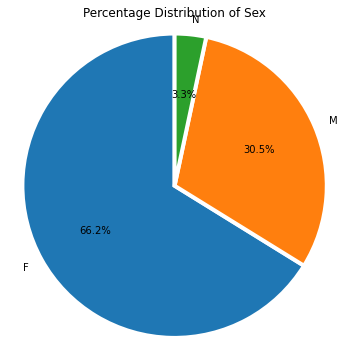

In [14]:
type_counts = df_visualization['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth':4.0,'edgecolor':'white'})
plt.title('Percentage Distribution of Sex')
plt.axis('equal') 
plt.show()

### Exploring Age and Gender Distribution

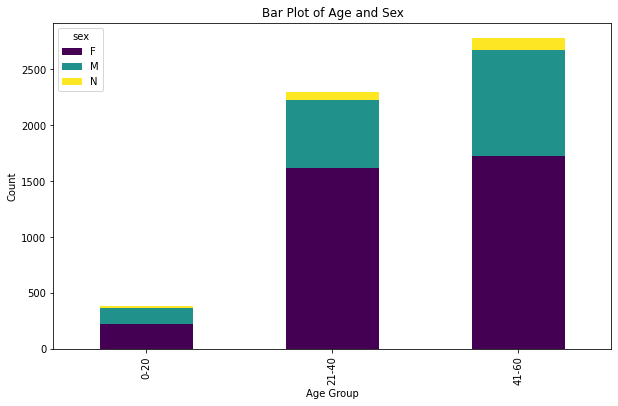

In [15]:
bins = [0, 20, 40, 60]
labels = ['0-20', '21-40', '41-60']
df_visualization['age_group'] = pd.cut(df_visualization['age'], bins=bins, labels=labels, right=False)
grouped_data = df_visualization.groupby(['age_group', 'sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar Plot of Age and Sex')
plt.show()
df_visualization.drop(['age_group'], axis = 1, inplace = True)

### Analyzing Boolean Column Distribution

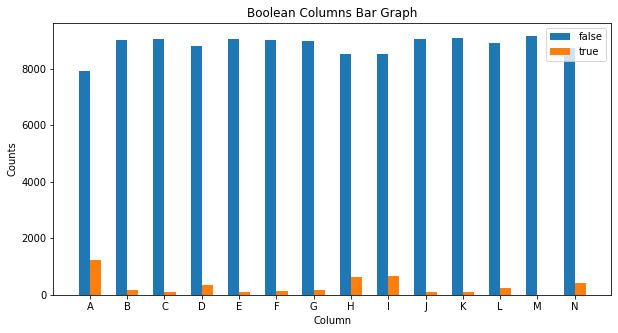

In [16]:
selected_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
                   'thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor',
                    'hypopituitary','psych']
counts = df_visualization[selected_columns].apply(pd.Series.value_counts).T
N = 14
blue_bar = (counts['f'])
orange_bar = (counts['t'])
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3       
plt.bar(ind, blue_bar , width, label='false')
plt.bar(ind + width, orange_bar, width, label='true')
plt.xlabel('Column')
plt.ylabel('Counts')
plt.title('Boolean Columns Bar Graph')
plt.xticks(ind + width / 2, ('A', 'B', 'C', 'D', 'E',
                   'F','G','H','I','J','K','L',
                    'M','N'))
plt.legend(loc='best')
plt.show()

### Exploring Measured Thyroid Parameters

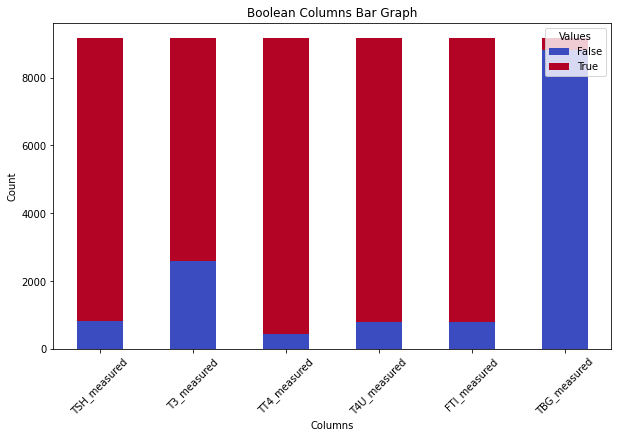

In [17]:
selected_columns = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured','TBG_measured']
counts = df_visualization[selected_columns].apply(pd.Series.value_counts).T
counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Boolean Columns Bar Graph')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Values', labels=['False', 'True'], loc='upper right')
plt.show()

### Comparing TSH Levels by Gender

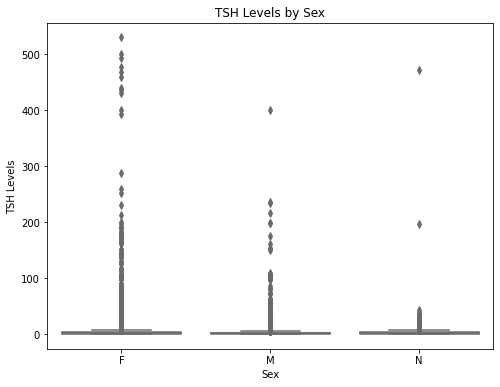

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='TSH', data=df_visualization, palette='Set3')
plt.xlabel('Sex')
plt.ylabel('TSH Levels')
plt.title('TSH Levels by Sex')
plt.show()

In [19]:
def process_target(target):
    classes = target.split('|')
    return classes

### Exploring Top Target Variables Distribution

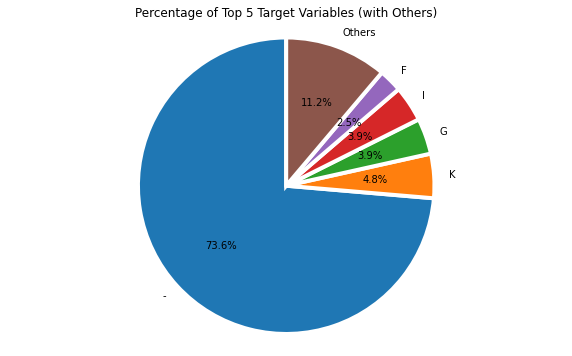

In [20]:
df_visualization['Processed_Target'] = df_visualization['target'].apply(process_target)
all_classes = [cls for classes in df_visualization['Processed_Target'] for cls in classes]
class_counts = pd.Series(all_classes).value_counts()
top_5_classes = class_counts.head(5)
other_count = class_counts[5:].sum()
top_5_classes['Others'] = other_count
plt.figure(figsize=(10, 6))
plt.pie(top_5_classes, labels=top_5_classes.index,  autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth':4.0,'edgecolor':'white'})
plt.title('Percentage of Top 5 Target Variables (with Others)')
plt.axis('equal') 
plt.show()
df_visualization.drop(['Processed_Target'], axis = 1, inplace = True)
df_visualization.drop(['referral_source'], axis = 1, inplace = True)

### Correlation Heatmap of Attributes

<Axes: >

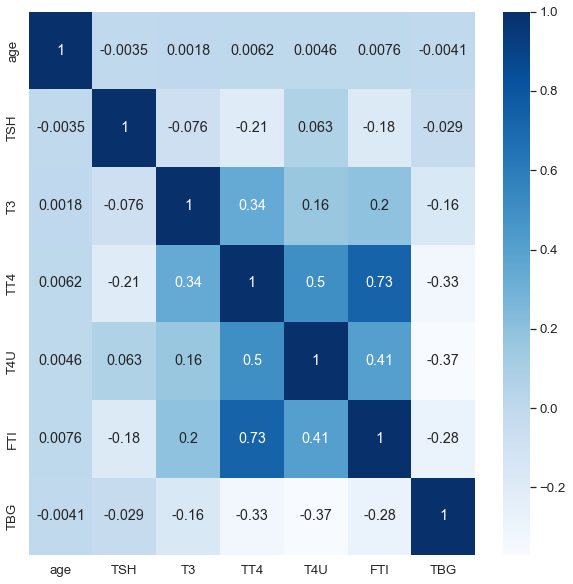

In [21]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.set(font_scale=1.2)
sns.heatmap(data=df_visualization.corr(), cmap='Blues', annot=True)

## Data Preprocessing
### Label Encoding for Categorical Data

In [22]:
label_encoder = LabelEncoder()
df_visualization['sex'] = label_encoder.fit_transform(df_visualization['sex'])
df_visualization['on_thyroxine'] = label_encoder.fit_transform(df_visualization['on_thyroxine'])
df_visualization['query_on_thyroxine'] = label_encoder.fit_transform(df_visualization['query_on_thyroxine'])
df_visualization['on_antithyroid_meds'] = label_encoder.fit_transform(df_visualization['on_antithyroid_meds'])
df_visualization['sick'] = label_encoder.fit_transform(df_visualization['sick'])
df_visualization['pregnant'] = label_encoder.fit_transform(df_visualization['pregnant'])
df_visualization['thyroid_surgery'] = label_encoder.fit_transform(df_visualization['thyroid_surgery'])
df_visualization['I131_treatment'] = label_encoder.fit_transform(df_visualization['I131_treatment'])
df_visualization['query_hypothyroid'] = label_encoder.fit_transform(df_visualization['query_hypothyroid'])
df_visualization['query_hyperthyroid'] = label_encoder.fit_transform(df_visualization['query_hyperthyroid'])
df_visualization['lithium'] = label_encoder.fit_transform(df_visualization['lithium'])
df_visualization['goitre'] = label_encoder.fit_transform(df_visualization['goitre'])
df_visualization['tumor'] = label_encoder.fit_transform(df_visualization['tumor'])
df_visualization['hypopituitary'] = label_encoder.fit_transform(df_visualization['hypopituitary'])
df_visualization['psych'] = label_encoder.fit_transform(df_visualization['psych'])
df_visualization['TSH_measured'] = label_encoder.fit_transform(df_visualization['TSH_measured'])
df_visualization['T3_measured'] = label_encoder.fit_transform(df_visualization['T3_measured'])
df_visualization['TT4_measured'] = label_encoder.fit_transform(df_visualization['TT4_measured'])
df_visualization['T4U_measured'] = label_encoder.fit_transform(df_visualization['T4U_measured'])
df_visualization['FTI_measured'] = label_encoder.fit_transform(df_visualization['FTI_measured'])
df_visualization['TBG_measured'] = label_encoder.fit_transform(df_visualization['TBG_measured'])

### Feature Scaling for Model Enhancement
Min-Max scaling to normalize selected columns within the DataFrame.

In [23]:
def column_to_normalize(df,column):
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

In [24]:
column_to_normalize(df_visualization,'age')
column_to_normalize(df_visualization,'TSH')
column_to_normalize(df_visualization,'T3')
column_to_normalize(df_visualization,'TT4')
column_to_normalize(df_visualization,'T4U')
column_to_normalize(df_visualization,'FTI')
column_to_normalize(df_visualization,'TBG')

###  Multi-Label Hyperthyroidism Classification
the 'target' column in the DataFrame 'df_visualization' for multi-label classification by replacing hyphens with 'X' and splitting the labels separated by '|' using MultiLabelBinarizer.

In [25]:
df_visualization['target'] = df_visualization['target'].replace('-', 'X')
df_visualization['target'] = df_visualization['target'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()

## Model Preparing
### Feature-Target Split 

In [26]:
y = mlb.fit_transform(df_visualization['target'])
X = df_visualization.drop(['target'], axis=1)
X.columns = X.columns.astype(str)

###  Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Testing
### Support Vector Machine (SVM) Classifier and Accuracy Visualization
A Support Vector Machine (SVM) classifier is trained and evaluated on the provided training and testing datasets (X_train, y_train, X_test, y_test). The classifier's accuracy on both the testing and training sets is calculated and displayed.

SVM  Testing Accuracy: 0.7463175122749591
SVM Training Accuracy: 0.7553554373038613


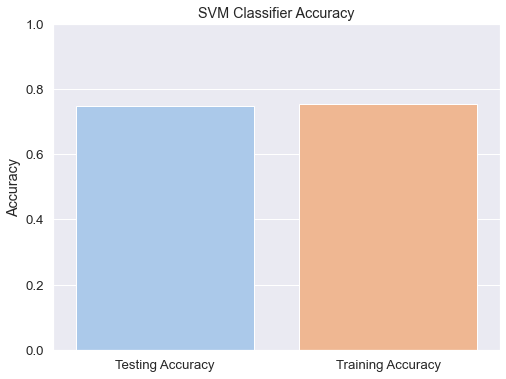

In [44]:
svm_classifier = OneVsRestClassifier(SVC(kernel='linear'))
svm_classifier.fit(X_train, y_train)
svm_preds = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_train_preds = svm_classifier.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
print(f"SVM  Testing Accuracy: {svm_accuracy}")
print(f"SVM Training Accuracy: {svm_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [svm_accuracy, svm_train_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='pastel')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to match accuracy range (0 to 1)
plt.show()

### Random Forest Classification and Accuracy Visualization
A Random Forest classifier to the training data, calculates both testing and training accuracies, and then displays the results. It also visualizes the accuracies using a bar chart, illustrating the performance of the Random Forest model on the dataset.

RF Testing Accuracy: 0.756683033278778
RF Training Accuracy: 0.7820985127575385


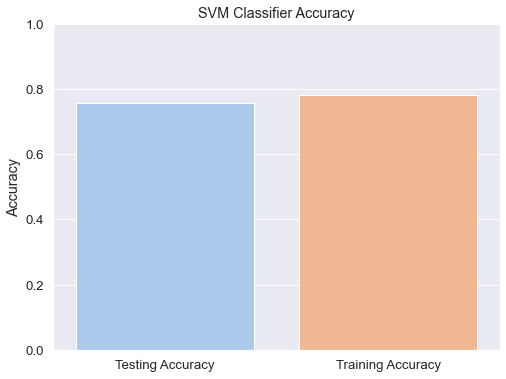

In [45]:
rf_classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=5))
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_train_preds = rf_classifier.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
print(f"RF Testing Accuracy: {rf_accuracy}")
print(f"RF Training Accuracy: {rf_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [rf_accuracy, rf_train_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='pastel')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to match accuracy range (0 to 1)
plt.show()

### Naive Bayes Classification and Accuracy Visualization
A Multinomial Naive Bayes (NB) classifier with a specified alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the NB model. The code also visualizes the accuracies using a bar chart, illustrating the performance of the NB model on the dataset.

NB  Testing Accuracy: 0.7135842880523732
NB Training Accuracy: 0.7228817028243962


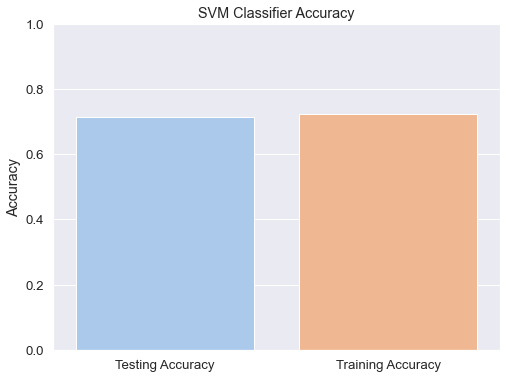

In [46]:
nb_classifier = OneVsRestClassifier(MultinomialNB())
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_preds)
nb_train_preds = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
print(f"NB  Testing Accuracy: {nb_accuracy}")
print(f"NB Training Accuracy: {nb_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nb_accuracy, nb_train_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='pastel')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to match accuracy range (0 to 1)
plt.show()

### Neural Network Classification and Accuracy Visualization
A Multi-Layer Perceptron (MLP) classifier with specific hidden layer sizes and alpha value is applied to the training data. It calculates and displays both testing and training accuracies for the MLP model. Additionally, the code visualizes the accuracies using a bar chart, illustrating the performance of the Neural Network model on the dataset.

NN  Testing Accuracy: 0.8041462084015275
NN Training Accuracy: 0.8706508391322145


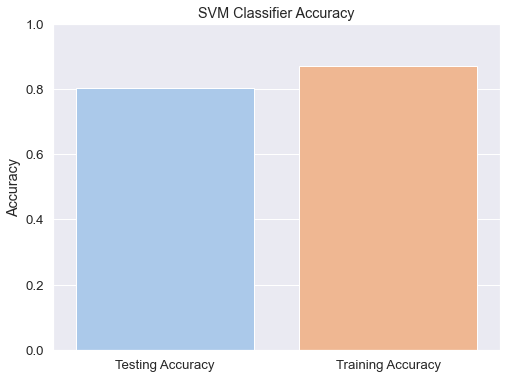

In [47]:
nn_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(64,32,16,), max_iter=1000))
nn_classifier.fit(X_train, y_train)
nn_preds = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_train_preds = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_preds)
print(f"NN  Testing Accuracy: {nn_accuracy}")
print(f"NN Training Accuracy: {nn_train_accuracy}")
categories = ['Testing Accuracy', 'Training Accuracy']
values = [nn_accuracy, nn_train_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='pastel')
plt.ylabel('Accuracy')
plt.title('SVM Classifier Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to match accuracy range (0 to 1)
plt.show()